In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Fig Size for display
figX = 6.4
figY = 4.8

# Introduction

A quantum two level system is in a superposition of states |0> and |1>. We cannot measure this state directly as coupling the system to a measuring apparatus would force the system into one of the eigenstates in a non-deterministic way. This is commonly referred to as collapsing the Schrodinger wave function.

In 1982, Richard Feynmann suggested that we would be able to exploit this quantum entanglement property to perform algorithms at a much quicker pace. Having two coupled quantum subsystems allows the whole system to be brought into a superposition of different states.

If we control the system's Hamiltonian and time evolution, we would be able to perform computation at a level unparallel (pun intended) to classical systems. Quantum computers would be able to perform tasks simultaneously, or take multiple computational steps at once, known as 'quantum parallelism'. The first step to build a quantum computer, however, is to engineer a qubit.

The solid-state qubit, as proposed by Loss and DiVincenzo describes a two level quantum system defined by the spin of an electron trapped in a quantum dot. The electron canc spin up or down depending on the orientation of the magnetic field that measures it. These eigenstates correspond to the two basis states of the qubit.

These quantum dots holds the electrons by providing negative voltages at the gates, which are on the surface of the metal. Therefore, by controlling the voltages and material of the metal, we are able to configure the quantum dot's properties.

# Method

## Part A

The Hamiltonian of the quantum dot is 

\begin{equation*}
\hat{H}=\begin{bmatrix}
    E & t \\
    t^* & -E 
\end{bmatrix}.
\end{equation*}

where $E$ is the energy of the system and $t$ is known as the tunnel coupling parameter.

Taking the determinant of the Hamiltonian less the identity matrix multiplied by the energy states and setting it to 0,

\begin{align*}
    \hat{H}-\epsilon I &=\begin{bmatrix}
        E - \epsilon & t \\
        t & -E-\epsilon
    \end{bmatrix} \\
    |\hat{H}-\epsilon I|&=(E-\epsilon)(-E-\epsilon)-t^2=0 \\
    &= -E^2 + \epsilon^2 - t^2 \\
    \epsilon &= \pm \sqrt{E^2+t^2}.
\end{align*}

We obtain the ground energy level as 

\begin{equation*}
\epsilon_0 = -\sqrt{E^2 +t^2}
\end{equation*}

and the energy of the first excited state as 

\begin{equation*}
\epsilon_1 = +\sqrt{E^2+t^2}.
\end{equation*}

The energy difference is then,

\begin{equation*}
\Delta \epsilon = \epsilon_1 - \epsilon_0 = 2\sqrt{E^2+t^2}.
\end{equation*}

By inspection, we find the minimum energy difference occurs when $E=t=0$, where $\Delta \epsilon = 0$. To find the probability of measuring a '0' state or a '1' state, we first need to solve the equation,

\begin{equation*}
    \hat{H} |\psi_{0/1}> = \epsilon |\psi_{0/1}>
\end{equation*}

where $\psi_0 = c_1 |0> + c_2 |1>$ and $\psi_1=c_3|0> + c_4 |1>$. Through an excessive amount of alegbra, we were able to obtain for $\psi_0$

\begin{align*}
c_1 &= \frac{t}{\sqrt{t^2+(\sqrt{E^2+t^2}+E)^2}} \\
c_2 &= \frac{\sqrt{E^2+t^2}+E}{\sqrt{t^2+(\sqrt{E^2+t^2}+E)^2}}
\end{align*}

and for $\psi_1$

\begin{align*}
c_3 &= \frac{t}{\sqrt{t^2+(\sqrt{E^2+t^2}-E)^2}} \\
c_4 &= \frac{\sqrt{E^2+t^2}-E}{\sqrt{t^2+(\sqrt{E^2+t^2}-E)^2}}
\end{align*}

Let us now plot these probabilities for some fixed value of t.

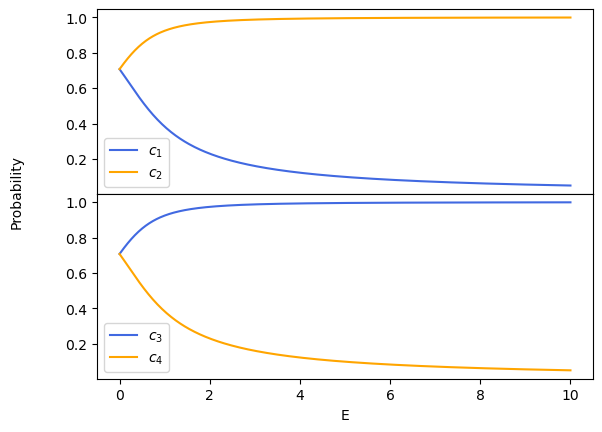

In [4]:
# Plotting code for probabilities above
t = 1
E = np.linspace(0,10,500)

c1 = t/np.sqrt(t**2+(np.sqrt(E**2+t**2)+E)**2)
c2 = (np.sqrt(E**2+t**2)+E)/np.sqrt(t**2+(np.sqrt(E**2+t**2)+E)**2)
c3 = t/np.sqrt(t**2+(np.sqrt(E**2+t**2)-E)**2)
c4 = (np.sqrt(E**2+t**2)-E)/np.sqrt(t**2+(np.sqrt(E**2+t**2)-E)**2)

f, axes = plt.subplots(2,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(E,c1,label=r'$c_1$',c='royalblue')
axes[0].plot(E,c2,label=r'$c_2$',c='orange')
axes[1].plot(E,c3,label=r'$c_3$',c='royalblue')
axes[1].plot(E,c4,label=r'$c_4$',c='orange')
axes[-1].set_xlabel('E')
axes[0].legend()
axes[1].legend()
f.text(0, 0.5, 'Probability', ha='center', va='center', rotation='vertical')
f.subplots_adjust(hspace=0)

## Code constant across all plots

In [5]:
# Constants
hbar = 1.055e-34
q = 1.602e-19
m = 9.109e-31 * 0.2

# Generating the mesh
Np = 300
a = 1e-10 #in metres
X = a*np.linspace(-Np//2,Np//2,Np) #in metres

# Define Hamiltonian as a tridiagonal matrix
def H_build(Potential):
    t0=(hbar*hbar)/(2*m*a*a) #working in Joules
    on=2.0*t0*np.ones(Np)
    off=-t0*np.ones(Np-1)
    return np.diag(on+Potential) + np.diag(off,1) + np.diag(off,-1)

# Return probability distributions for ground and first excited state
def eigenstates(H):
    eigval,eigvec=np.linalg.eig(H)
    idx = eigval.argsort()[::1]   
    eigval = eigval[idx]
    eigvec = eigvec[:,idx]
    dE = eigval[1] - eigval[0]
    Psi_0 = eigvec[:,0]
    Psi_1 = eigvec[:,1]
    Psi_0_squared = np.abs(Psi_0)**2
    Psi_1_squared = np.abs(Psi_1)**2
    Psi_0_squared /= np.sum(Psi_0_squared)
    Psi_1_squared /= np.sum(Psi_1_squared)
    return Psi_0, Psi_1, dE, Psi_0_squared, Psi_1_squared, eigval[0], eigval[1]

### Different potentials

In [6]:
# Single quantum dot 
def V_SQD(frequency): # frequency on order of 1e15 - frequency of harmonic oscillator
    alpha = 0.5*m*frequency**2
    return alpha*(X**2)

# Double quantum dot (static)
def V_DQD(separation_distance,frequency): # r on order of 1e-9 - input as nm - separation distance between quantum dot centres
    alpha = 0.5*m*frequency**2
    r = separation_distance / 2 * 1e-9
    V1 = alpha * (X + r)**2     
    V2 = alpha * (X - r)**2
    return np.minimum(V1, V2)

# Double quantum dot (with detuning bias)
def V_DQDF(F,frequency,separation_distance,t=0): #F on order of 1e11 -  electric field strength 
    return V_DQD(separation_distance,frequency) + F*q*X*np.cos(frequency*t)

## Results

### Part B
#### (i)

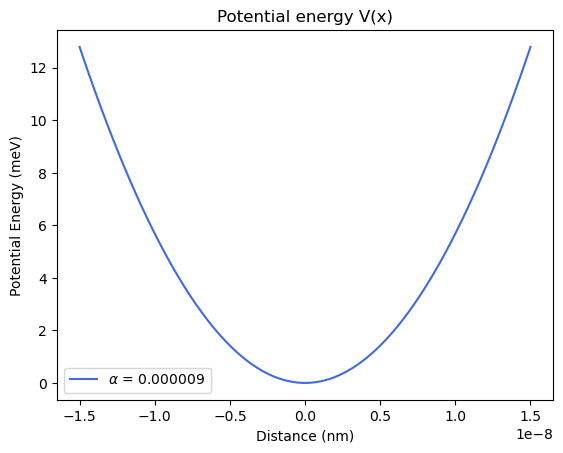

In [7]:
omega = 1e13
alpha = 0.5*m*omega**2

plt.figure(figsize=(figX,figY))
plt.plot(
    X,
    1e3*V_SQD(omega)/q,
    c='royalblue',
    label=rf'$\alpha$ = {alpha:.6f}'
)

plt.title('Potential energy V(x)')
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (meV)')
plt.legend()
plt.show()

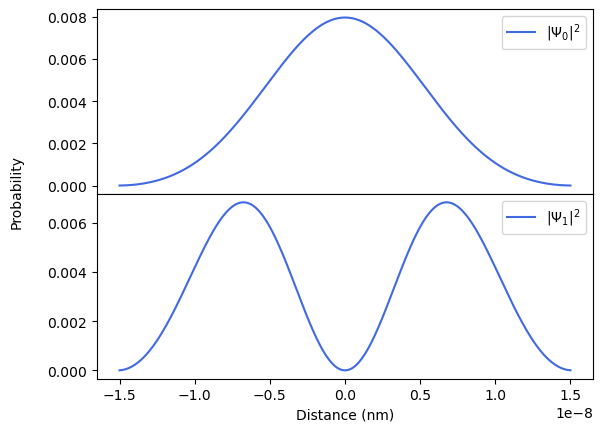

In [8]:
omega = 1e13
alpha = 0.5*m*omega**2

f, axes = plt.subplots(2,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,eigenstates(H_build(V_SQD(omega)))[3],c='royalblue',label=r'$|\Psi_0|^2$')
axes[1].plot(X,eigenstates(H_build(V_SQD(omega)))[4],c='royalblue',label=r'$|\Psi_1|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
f.text(0, 0.5, 'Probability', ha='center', va='center', rotation='vertical')
f.subplots_adjust(hspace=0)

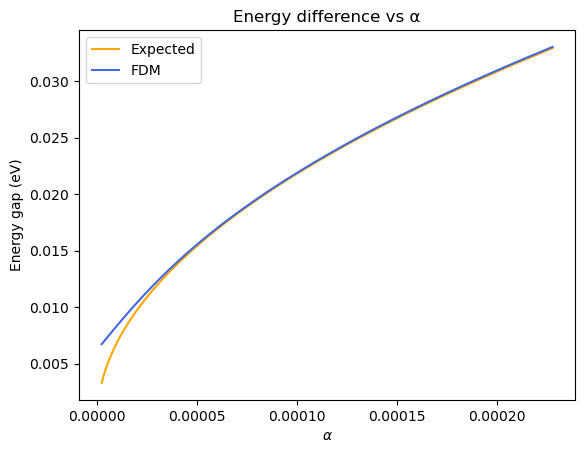

In [9]:
omega = np.linspace(5e12,5e13,Np)
alpha = 0.5 * m * omega**2
energy_diff = []

for i in alpha:
    V = i * (X**2)
    H = H_build(V)
    energy_diff.append(eigenstates(H)[2])

energy_diff = np.array(energy_diff)

def dE(alpha):
    return hbar*np.sqrt(2*alpha/m)

plt.figure(figsize=(figX,figY))
plt.plot(alpha, dE(alpha)/q,c='orange',label='Expected')
plt.plot(alpha, energy_diff/q,c='royalblue',label='FDM')

plt.xlabel(r'$\alpha$')
plt.ylabel('Energy gap (eV)')
plt.title('Energy difference vs α')
plt.legend(loc='upper left')
plt.show()

To obtain an energy splitting of 4 meV, we would need to solve the following pair of equations for $\alpha$, the energy difference in a harmonic oscillator is 
given by

\begin{equation*}
\Delta E = \bar{H}\omega
\end{equation*}

and the frequency of the oscillator is related to the parameter $\alpha$ by 

\begin{align*}
\alpha &= \frac{1}{2}m\omega^2 \\
\omega &= \sqrt{\frac{2\alpha}{m}}.
\end{align*}

This leads us to 

\begin{equation*}
\alpha = \frac{(\Delta E)^2 m}{2\bar{h}^2}.
\end{equation*}

Subtituting in the energy splitting of 4 meV, we obtain 

\begin{equation*}
\alpha = 3.361 \times 10^{-6} \text{ Nm}^{-1}.
\end{equation*}

To engineer lower values of $\alpha$, we want the electrons to have less energy spacing. The frequency of the oscillator needs to be lower, in a classical analogy, the restoring force of the particle needs to be weak. This means that the electron is less tightly confined and its wavefunction is wider. This means that increasing the quantum dot size will lower the value of $\alpha$. By decreasing the effective mass of the electron by changing the material of the quantum dot then alpha would also decrease however this can be achieved relatively easily. Furthermore, additional energy states beyond the first excited state may have greater spacing so limiting the electron to only populating the ground and first excited state would be ideal.

From Boltzmann distribution, the mean energy of an electron is given as

\begin{equation*}
\bar{E} = \frac{1}{2}\hbar\omega + \frac{\hbar\omega}{e^{\beta \hbar\omega}-1}
\end{equation*}

where $\beta = 1/k_BT$

In the classical limit, $k_BT \gg \hbar \omega$, $\beta \hbar \omega \rightarrow 0$ and so
\begin{equation*}
\bar{E}= \frac{1}{2}\hbar \omega +k_BT.
\end{equation*}

This is unideal for our situation as we want the mean energy of the electron to be as low as possible so if $kT \ll \hbar \omega$,

\begin{equation*}
\bar{E}=\frac{1}{2}\hbar \omega.
\end{equation*}

We find that now the mean energy is independent of $T$. This is a quantum effect known as 'Freeze out', where modes of the gas are frozen, i.e the degrees of freedom of the gas is lowered. This means that the higher energy states of the electron are restricted. Therefore, for the quantum dot, we want to work in the regime of $kT \ll \hbar \omega$, or just close to zero at cryogenic temperatures. For an oscillating frequency of $1\times 10^{13} \text{ rads}^{-1}$, the temperature must be much less than 75 K. We should be operating in the 100 mK range.

#### (ii)

To ensure our results do not suffer from numerical artifacts, the amount of points in the mesh was steadily increased where the plot of energy difference versus alpha was matching theoretical results.

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


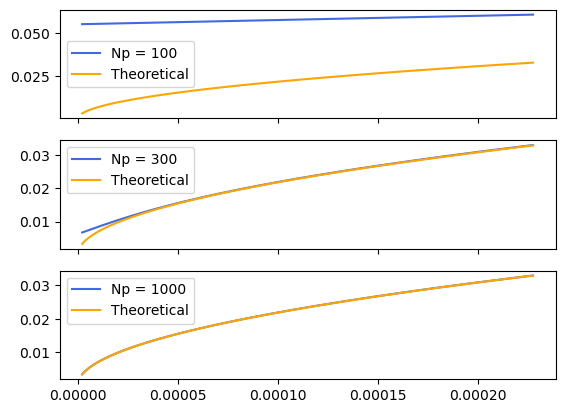

In [10]:
Np_array = [100,300,1000]
a = 1e-10 #in metres

def dE(alpha):
    return hbar*np.sqrt(2*alpha/m)

def H_build_test(Potential,Np):
    t0=(hbar*hbar)/(2*m*a*a) #working in Joules
    on=2.0*t0*np.ones(Np)
    off=-t0*np.ones(Np-1)
    return np.diag(on+Potential) + np.diag(off,1) + np.diag(off,-1)

f,axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label=r'$\alpha$')

for i in range(len(Np_array)):
    Np = Np_array[i]
    X = a*np.linspace(-Np//2,Np//2,Np)
    omega = np.linspace(5e12,5e13,Np)
    alpha = 0.5 * m * omega**2
    energy_diff = []

    for j in alpha:
        V = j * (X**2)
        H = H_build_test(V,Np)
        energy_diff.append(eigenstates(H)[2])
    
    energy_diff = np.array(energy_diff)
    axes[i].plot(alpha,energy_diff/q,label=f'Np = {Np_array[i]}',c='royalblue')
    axes[i].plot(alpha,dE(alpha)/q,label='Theoretical',c='orange')
    axes[i].legend()

Due to computational power restraints, we could not use a 1000 point mesh grid and so we settled for setting $Np = 300$. From the graph above, this would be inaccurate at low $\alpha$ so for the next parts of this report, we will be using $\alpha = 0.02$.

#### (iii)

The energy of a particle in a 3D cube in the ground state is 

\begin{equation*}
E_0 = \frac{3\pi^2 \hbar^2}{2mL^2}
\end{equation*}

where L is the length of the cube. In this scenario, the 'cube' can be thought of as the confinement of the electron, defined by its wavefunction. From Part B(i), we know that the size of the quantum dot and its material is what defines this confinement length. The energy of the first excited state is 

\begin{equation*}
E_1 = \frac{3\pi^2 \hbar^2}{mL^2}
\end{equation*}

and so the energy difference is simply equal to the ground state energy as $E_1 = 2E_0$. Rearranging the equation for the energy difference to obtain the characteristic length of the quantum dot,

\begin{equation*}
L = \sqrt{\frac{3\pi^2 \hbar^2}{2m\Delta E}}.
\end{equation*}

For a 4 meV energy split, $L=3.76 \times 10^{-8}$ m. Therefore, if atoms in a silicon crystal along a 1D chain are spaced by 0.543 nm, the ground state of a quantum dot wavefunction will span for approximately 69 atoms.

The main reason why quantum dots are often called 'artificial atoms' are because of the discrete energy spectrum of the system. This occurs when the size of the quantum dot is comparable to the wavelength of the electrons that occupy it. This can be seen in hydrogen, where its Bohr radius is $5.29\times10^{-11}$ m or $0.529 \r{\text{A}}$. The ground state energy of hydrogen is -13.6 eV and so the wavelength of the electrons that occupy it can be found using de Broglie's relation,

\begin{equation*}
    \lambda = \frac{2\pi\hbar}{\sqrt{2mE}}.
\end{equation*}

For an electron at ground state, the wavelength would be $3.33 \r{\text{A}} \sim 0.529 \r{\text{A}}$.

### Part C
#### (i)

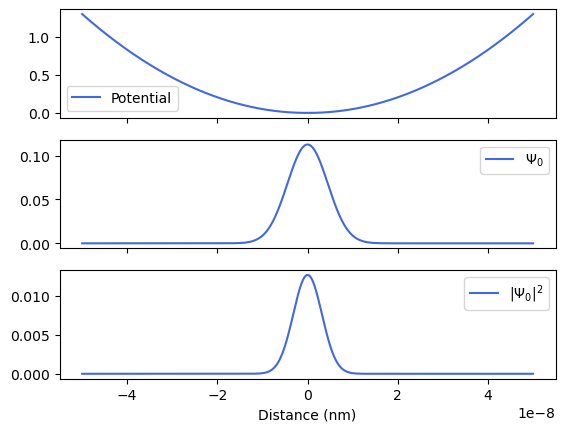

In [11]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 0.5

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQD(r,omega)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQD(r,omega)))[0],c='royalblue',label=r'$\Psi_0$')
axes[2].plot(X,eigenstates(H_build(V_DQD(r,omega)))[3],c='royalblue',label=r'$|\Psi_0|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()

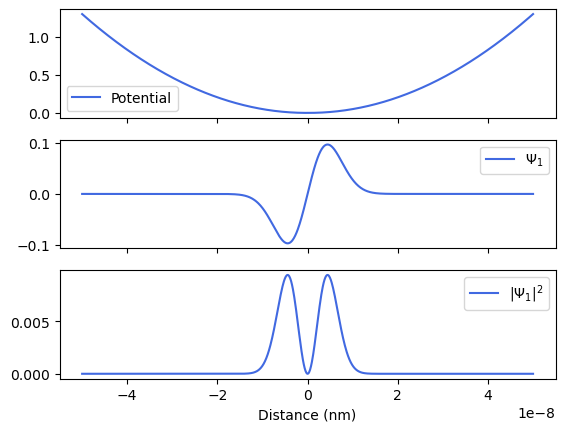

In [12]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 0.5

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQD(r,omega)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQD(r,omega)))[1],c='royalblue',label=r'$\Psi_1$')
axes[2].plot(X,eigenstates(H_build(V_DQD(r,omega)))[4],c='royalblue',label=r'$|\Psi_1|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()

As we can see, when the dot separation is small enough at 0.5 nm, the double quantum dot is effectively a single quantum dot as its wavefunction is identical for both dots. This is a strong coupling.

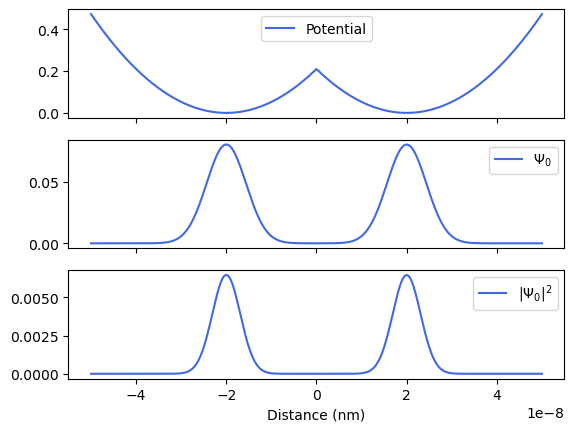

In [13]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 40

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQD(r,omega)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQD(r,omega)))[0],c='royalblue',label=r'$\Psi_0$')
axes[2].plot(X,eigenstates(H_build(V_DQD(r,omega)))[3],c='royalblue',label=r'$|\Psi_0|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()

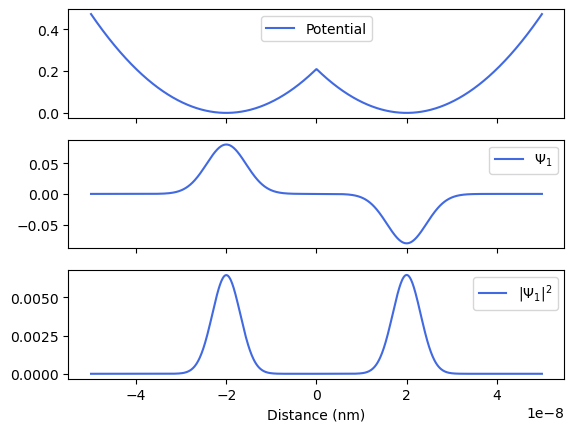

In [14]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 40

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQD(r,omega)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQD(r,omega)))[1],c='royalblue',label=r'$\Psi_1$')
axes[2].plot(X,eigenstates(H_build(V_DQD(r,omega)))[4],c='royalblue',label=r'$|\Psi_1|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()

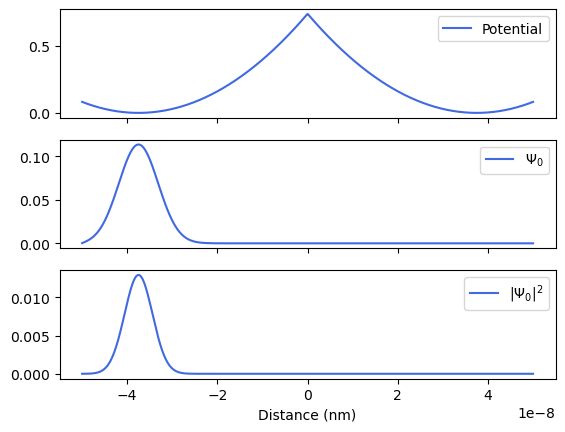

In [15]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 75

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQD(r,omega)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQD(r,omega)))[0],c='royalblue',label=r'$\Psi_0$')
axes[2].plot(X,eigenstates(H_build(V_DQD(r,omega)))[3],c='royalblue',label=r'$|\Psi_0|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()

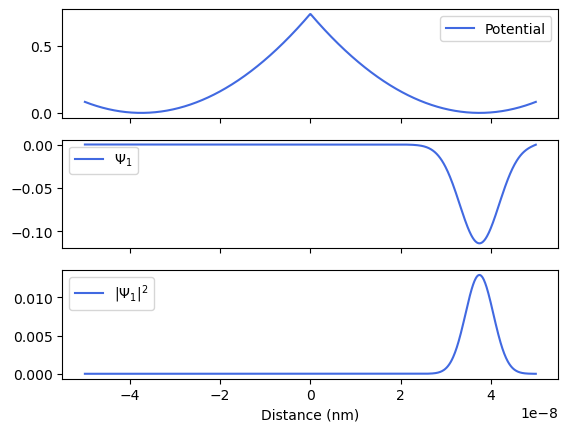

In [16]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 75

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQD(r,omega)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQD(r,omega)))[1],c='royalblue',label=r'$\Psi_1$')
axes[2].plot(X,eigenstates(H_build(V_DQD(r,omega)))[4],c='royalblue',label=r'$|\Psi_1|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()

For the moderate and weak coupling, we find that their wavefunctions are less overlapping, indicating weaker quantum tunneling between the dots. The further away the two quantum dots, the more the energy level splits, breaking the initial degeneracy. For the moderately coupled double quantum dot, the lowest two wavefunctions display similar characteristics, being the two peaks at the same two locations. However they differ as in the ground state, the two peaks are in phase with each other whereas in the first excited state there is a clear $\pi$ phase shift. As we raise the tunnel barrier to a height where there is no more tunneling, we find that the states have localised in each quantum dot. We find that the ground state electrons only exist and are the only existing electrons in the left quantum dot and likewise for the right quantum dot and the first excited state. This is likely due to the imperfections of numerical methods. Theoretically, the wavefunction should be delocalised across both wells, producing a symmetric ground state and an antisymmetric first excited state as we saw before. However, any slight asymmetry, which would easily arise in computational methods, there would be a preference for each state. This is seen in the graph in Part A, resulting from the degeneracy of the electronic energy levels as the energy of the system approaches zero.

(ii)

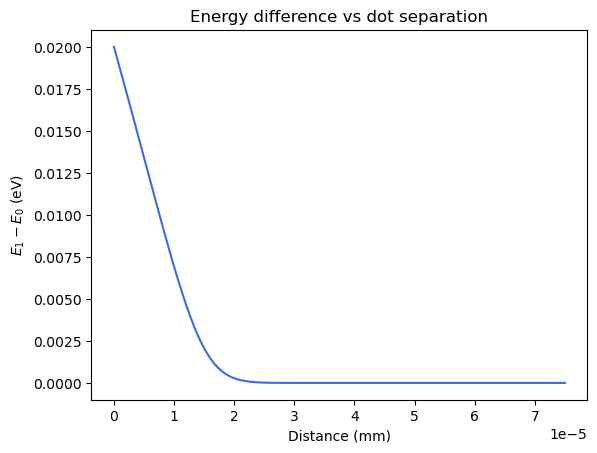

In [17]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r_range = np.linspace(0,75,100)

dE = []

for i in r_range:
    V = V_DQD(i,omega)
    H = H_build(V)
    dE.append(eigenstates(H)[2])

dE = np.array(dE)

plt.figure(figsize=(figX,figY))
plt.title('Energy difference vs dot separation')
plt.xlabel('Distance (mm)')
plt.ylabel(r'$E_1 - E_0$ (eV)')
plt.plot(r_range*1e-6,dE/q,c='royalblue')

We find that the energy level separation decays exponentially as the distance between the quantum dots increase. This is expected as the tunnel coupling strength is dependent on the distance, 

\begin{equation*}
t = e^{-\frac{d}{d_0}}
\end{equation*}

where $d_0$ is the characteristic length scale that depends on the height of the potential barrier and the electron's effective mass in the material. The energy splitting is directly proportional to tunnel coupling. This is because the localised states in each dot hybridise into bonding and antibonding combinations. Since the bonding states are lower in energy and the antibonding state is higher in energy, the overlap in the wavefunction makes the energy splitting between these two states larger. The bonding states occur when the two wavefunctions combine constructively whereas the antibonding states combine destructively. This was seen in the previous plots of the wavefunction, where the moderately coupled wavefunctions possess antisymmetric and symmetric wavefunctions for the ground and first excited state however this characteristic is lost when the distance between the dots is large enough. This tunnel coupling strength parameter is denoted by the $t$ found in Part A. Therefore, this can not be present in the classical case as it relies on quantum effects. Physically, this coupling parameter is dependent on the height of the potential well which is determined by barrier height and width, effective mass of the electron and the energy of the electron relative to the barrier.

A smaller dot to dot separation is desirable but not too small as the energy levels become too degenerate. There is an optimal separation which is found by balancing the trade offs between suppressed tunneling and too much hybridisation. We want to be able to distinguish between two quantum dots whilst also being able to move electrons via tunneling between them so that we can use their superposition as the qubits for our quantum computer.

#### (iii)

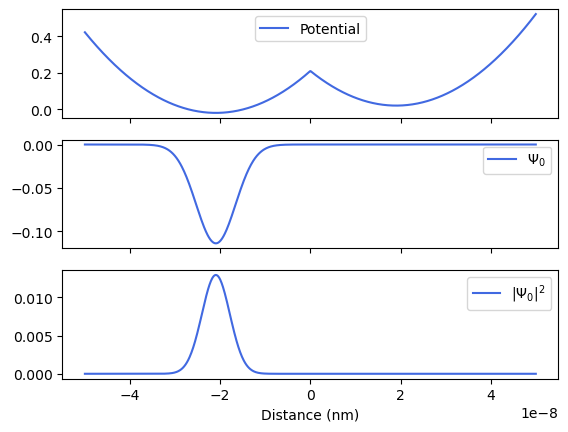

In [39]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 40
F = 1e6

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQDF(F,omega,r)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQDF(F,omega,r)))[0],c='royalblue',label=r'$\Psi_0$')
axes[2].plot(X,eigenstates(H_build(V_DQDF(F,omega,r)))[3],c='royalblue',label=r'$|\Psi_0|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()

Text(0.025, 0.5, 'Probability')

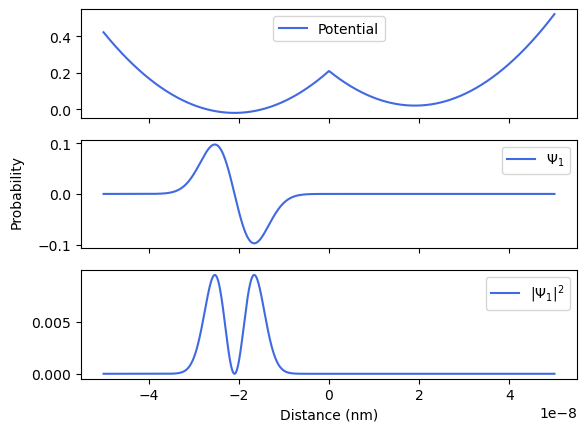

In [38]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 40
F = 1e6

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQDF(F,omega,r)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQDF(F,omega,r)))[1],c='royalblue',label=r'$\Psi_1$')
axes[2].plot(X,eigenstates(H_build(V_DQDF(F,omega,r)))[4],c='royalblue',label=r'$|\Psi_1|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()
f.text(0.025, 0.5, 'Probability', ha='center', va='center', rotation='vertical')

Text(0.025, 0.5, 'Probability')

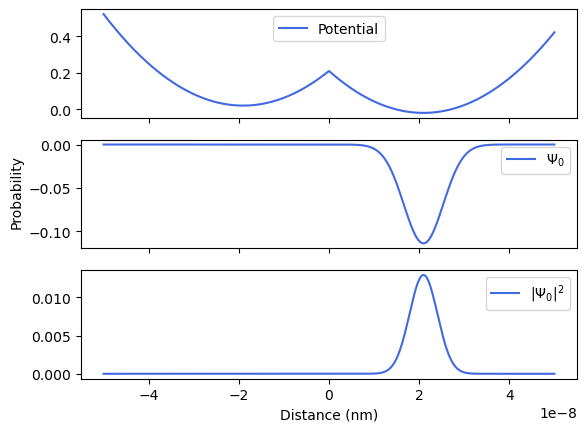

In [37]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 40
F = -1e6

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQDF(F,omega,r)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQDF(F,omega,r)))[0],c='royalblue',label=r'$\Psi_0$')
axes[2].plot(X,eigenstates(H_build(V_DQDF(F,omega,r)))[3],c='royalblue',label=r'$|\Psi_0|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()
f.text(0.025, 0.5, 'Probability', ha='center', va='center', rotation='vertical')

Text(0.025, 0.5, 'Probability')

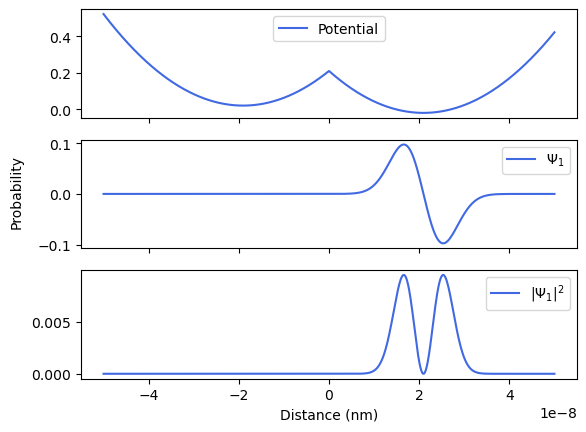

In [36]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 40
F = -1e6

f, axes = plt.subplots(3,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(X,V_DQDF(F,omega,r)/q,c='royalblue',label='Potential')
axes[1].plot(X,eigenstates(H_build(V_DQDF(F,omega,r)))[1],c='royalblue',label=r'$\Psi_1$')
axes[2].plot(X,eigenstates(H_build(V_DQDF(F,omega,r)))[4],c='royalblue',label=r'$|\Psi_1|^2$')
axes[-1].set_xlabel('Distance (nm)')
axes[0].legend()
axes[1].legend()
axes[2].legend()
f.text(0.025, 0.5, 'Probability', ha='center', va='center', rotation='vertical')

As expected, when the sign of $F$ is changed, the preferred quantum dot is flipped. The preferred quantum dot is one in the direction of the field as it minimises the electron's energy i.e the electrons will tunnel to the quantum dot with the lowest potential energy. We observed that the introduction of an electric field simply adds a lateral shift to the wavefunction, indicating the electron's preference towards one dot.

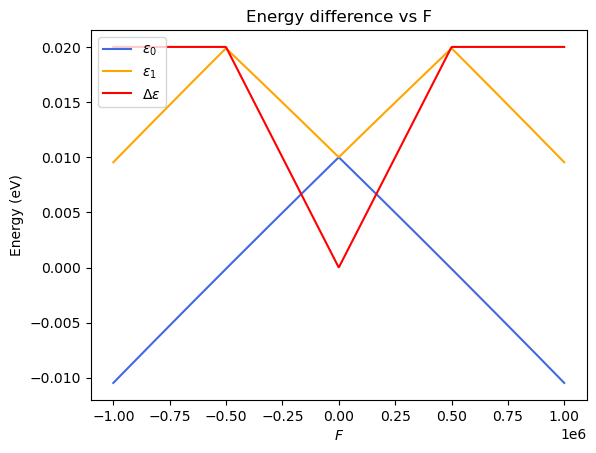

In [32]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m
r = 40

F_range = np.linspace(-1e6,1e6,1000)

E0 = []
E1 = []

for i in F_range:
    V = V_DQDF(i,omega,r)
    H = H_build(V)
    E0.append(eigenstates(H)[5])
    E1.append(eigenstates(H)[6])

E0 = np.array(E0)
E1 = np.array(E1)

plt.figure(figsize=(figX,figY))
plt.plot(F_range,E0/q,c='royalblue',label=r'$\epsilon_0$')
plt.plot(F_range,E1/q,c='orange',label=r'$\epsilon_1$')
plt.plot(F_range,(E1-E0)/q,c='red',label=r'$\Delta \epsilon$')
    
plt.xlabel(r'$F$')
plt.ylabel('Energy (eV)')
plt.title('Energy difference vs F')
plt.legend(loc='upper left')
plt.show()

Again, the parameter of the Hamiltonian from Part A here is also the tunnel coupling factor. The electrons want to be in regions of lower potential and so the greater the potential difference (i.e the voltage of the gate), the greater the chance of tunneling electrons. As mentioned before, we want the electronic energy levels to be small but not degenerate so we want to operate near F = 0. Looking at the graph above, for an energy split of 4 meV, we want to $F$ to be in the range of -0.125 to 0.125 Mega Volts per metre or -0.125 to 0.125 mV.

This graph verifies the analytical solution we found in Part A. The $E$ term in the Hamiltonian denotes the energy of the system which would include the detuning bias. The graph in Part A predicted that as $E$ gets bigger, there is a preferred eigenstate for each wave function. As $E$ gets smaller then the probability of each eigenstate becomes the same, and infact its eigenvalue as shown in the graph above, becomes the same, meaning that the energy levels are degenerate which is what we saw in the no detuning bias graphs.

### Part D
#### (i)

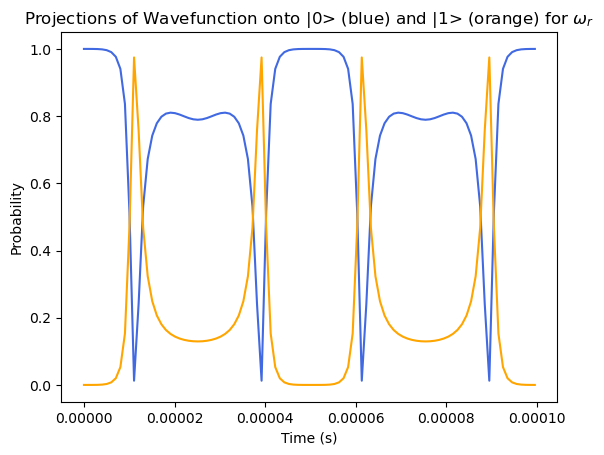

In [64]:
r = 40
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m

# No detuning bias for resonant frequency
omega_r = eigenstates(H_build(V_DQD(r,omega)))[2]/hbar

# With detuning
psi_0 = eigenstates(H_build(V_DQD(r,omega_r)))[0]
psi_1 = eigenstates(H_build(V_DQD(r,omega_r)))[1]
F = 5e4

t_min = 0
t_max = 2 * np.pi / (omega_r)
dt = t_max/50
t_range = np.arange(t_min,2*t_max,dt)

proj_0_t = []
proj_1_t = []

psi = psi_0.copy()

for t in t_range:
    Vt = V_DQDF(F,omega_r,r,t)
    Ht = H_build(Vt)

    c0 = np.vdot(psi_0, psi)
    c1 = np.vdot(psi_1, psi)

    p0 = np.abs(c0)**2
    p1 = np.abs(c1)**2

    proj_0_t.append(p0)
    proj_1_t.append(p1)

    Vt_next = V_DQDF(F,omega_r,r,t+dt)
    Ht_next = H_build(Vt_next)

    A = np.eye(Np) + 1j * dt/(2*hbar) * Ht_next
    B = np.eye(Np) - 1j * dt/(2*hbar) * Ht

    psi_new = np.linalg.solve(A,B @ psi)
    psi = psi_new / np.linalg.norm(psi_new)

proj_0_t = np.array(proj_0_t)
proj_1_t = np.array(proj_1_t)

plt.figure(figsize=(figX,figY))
plt.plot(t_range, proj_0_t, label="Projection onto |0> (blue)",c='royalblue')
plt.plot(t_range, proj_1_t, label="Projection onto |1> (orange)",c='orange')
plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title(r"Projections of Wavefunction onto |0> (blue) and |1> (orange) for $\omega_r$")
plt.show()


The graph above uses $F=5\times 10^{4} \text{Nm}^{-1}$ at a dot separation of 40 nm with an $\alpha$ of 0.02 like the systems before. This would produce perfect Rabi oscillations as the electron moves from one state to the other without any decay. This graph simply is a continuation of Part C (iii) whereby the changing sign of $F$ produces varying preferences of dots from the electron. These oscillations would introduce more noise if the parameters of $F$, $\alpha$ and dot separation were changed. To find the perfect oscillation, we fixed 2 of the three parameters being $\alpha$ and dot separation and varied the electric field strength to eventually produce the correct oscillations.

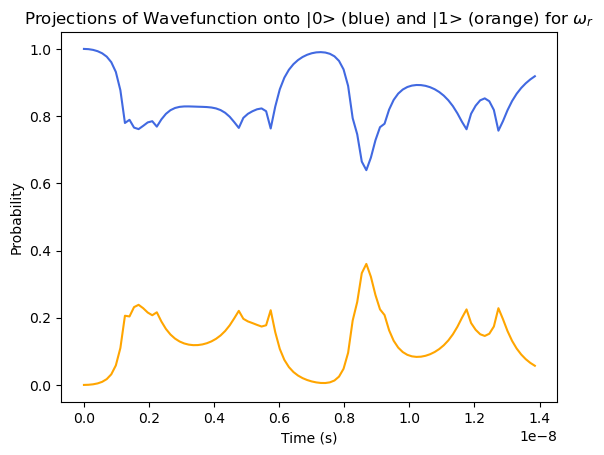

In [71]:
r = 30
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m

# No detuning bias for resonant frequency
omega_r = eigenstates(H_build(V_DQD(r,omega)))[2]/hbar

# With detuning
psi_0 = eigenstates(H_build(V_DQD(r,omega_r)))[0]
psi_1 = eigenstates(H_build(V_DQD(r,omega_r)))[1]
F = 5e4

t_min = 0
t_max = 2 * np.pi / (omega_r)
dt = t_max/50
t_range = np.arange(t_min,2*t_max,dt)

proj_0_t = []
proj_1_t = []

psi = psi_0.copy()

for t in t_range:
    Vt = V_DQDF(F,omega_r,r,t)
    Ht = H_build(Vt)

    c0 = np.vdot(psi_0, psi)
    c1 = np.vdot(psi_1, psi)

    p0 = np.abs(c0)**2
    p1 = np.abs(c1)**2

    proj_0_t.append(p0)
    proj_1_t.append(p1)

    Vt_next = V_DQDF(F,omega_r,r,t+dt)
    Ht_next = H_build(Vt_next)

    A = np.eye(Np) + 1j * dt/(2*hbar) * Ht_next
    B = np.eye(Np) - 1j * dt/(2*hbar) * Ht

    psi_new = np.linalg.solve(A,B @ psi)
    psi = psi_new / np.linalg.norm(psi_new)

proj_0_t = np.array(proj_0_t)
proj_1_t = np.array(proj_1_t)

plt.figure(figsize=(figX,figY))
plt.plot(t_range, proj_0_t, label="Projection onto |0> (blue)",c='royalblue')
plt.plot(t_range, proj_1_t, label="Projection onto |1> (orange)",c='orange')
plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title(r"Projections of Wavefunction onto |0> (blue) and |1> (orange) for $\omega_r$")
plt.show()


Here we see deteroriated Rabi oscillations when $\alpha$ and $F$ are fixed but $r$ goes from 40 nm to 30 nm. In the case of changing dot separation, the periodic nature of the wavefunction is lost.

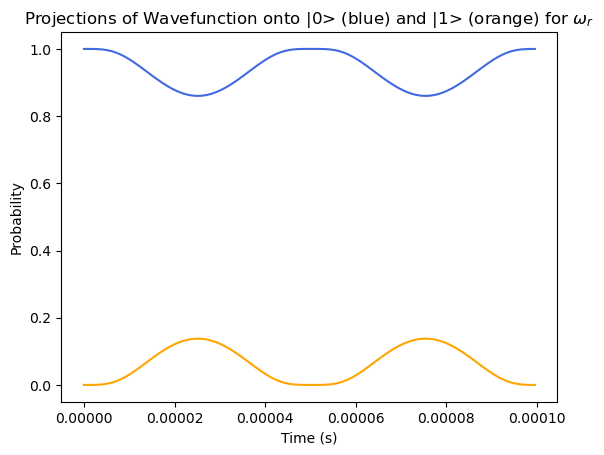

In [80]:
r = 40
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m

# No detuning bias for resonant frequency
omega_r = eigenstates(H_build(V_DQD(r,omega)))[2]/hbar

# With detuning
psi_0 = eigenstates(H_build(V_DQD(r,omega_r)))[0]
psi_1 = eigenstates(H_build(V_DQD(r,omega_r)))[1]
F = 1e4

t_min = 0
t_max = 2 * np.pi / (omega_r)
dt = t_max/50
t_range = np.arange(t_min,2*t_max,dt)

proj_0_t = []
proj_1_t = []

psi = psi_0.copy()

for t in t_range:
    Vt = V_DQDF(F,omega_r,r,t)
    Ht = H_build(Vt)

    c0 = np.vdot(psi_0, psi)
    c1 = np.vdot(psi_1, psi)

    p0 = np.abs(c0)**2
    p1 = np.abs(c1)**2

    proj_0_t.append(p0)
    proj_1_t.append(p1)

    Vt_next = V_DQDF(F,omega_r,r,t+dt)
    Ht_next = H_build(Vt_next)

    A = np.eye(Np) + 1j * dt/(2*hbar) * Ht_next
    B = np.eye(Np) - 1j * dt/(2*hbar) * Ht

    psi_new = np.linalg.solve(A,B @ psi)
    psi = psi_new / np.linalg.norm(psi_new)

proj_0_t = np.array(proj_0_t)
proj_1_t = np.array(proj_1_t)

plt.figure(figsize=(figX,figY))
plt.plot(t_range, proj_0_t, label="Projection onto |0> (blue)",c='royalblue')
plt.plot(t_range, proj_1_t, label="Projection onto |1> (orange)",c='orange')
plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title(r"Projections of Wavefunction onto |0> (blue) and |1> (orange) for $\omega_r$")
plt.show()


We see some oscillatons when $F$ is decreased to $1\times 10^{4}$ however the projections do not reach both 0 and 1. An interesting finding is that when $F$ is increased above $5 \times 10^{4}$, the oscillations become overmodulated and so the result we see above can be thought of as an undermodulation like in classical wave theory where an input modulating wave and a carrier wave are superimposed to produce a modulated wave. In this case, the wavefunction is the carrier wave and the input modulating wave is the electric field and so by changing the strength of the input modulating wave, we can achieve different modulations of the Rabi oscillations.

#### (ii)

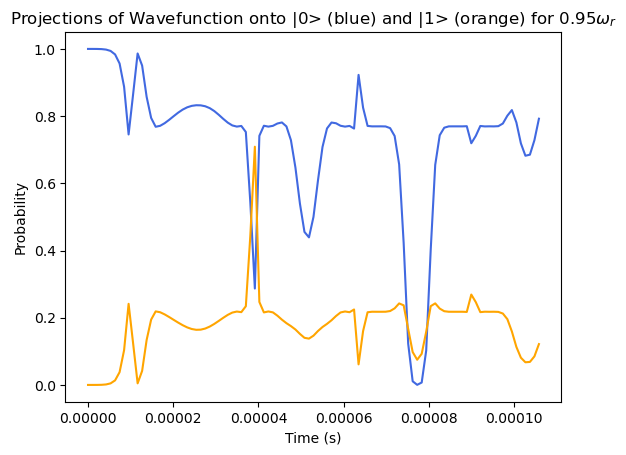

In [65]:
r = 40
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m

# No detuning bias for resonant frequency
omega_r_095 = 0.95*eigenstates(H_build(V_DQD(r,omega)))[2]/hbar

# With detuning
psi_0 = eigenstates(H_build(V_DQD(r,omega_r_095)))[0]
psi_1 = eigenstates(H_build(V_DQD(r,omega_r_095)))[1]
F = 5e4

t_min = 0
t_max = 2 * np.pi / (omega_r_095)
dt = t_max/50
t_range = np.arange(t_min,2*t_max,dt)

proj_0_t_095 = []
proj_1_t_095 = []

psi = psi_0.copy()

for t in t_range:
    Vt = V_DQDF(F,omega_r_095,r,t)
    Ht = H_build(Vt)

    c0 = np.vdot(psi_0, psi)
    c1 = np.vdot(psi_1, psi)

    p0 = np.abs(c0)**2
    p1 = np.abs(c1)**2

    proj_0_t_095.append(p0)
    proj_1_t_095.append(p1)

    Vt_next = V_DQDF(F,omega_r,r,t+dt)
    Ht_next = H_build(Vt_next)

    A = np.eye(Np) + 1j * dt/(2*hbar) * Ht_next
    B = np.eye(Np) - 1j * dt/(2*hbar) * Ht

    psi_new = np.linalg.solve(A,B @ psi)
    psi = psi_new / np.linalg.norm(psi_new)

proj_0_t_095 = np.array(proj_0_t_095)
proj_1_t_095 = np.array(proj_1_t_095)

plt.figure(figsize=(figX,figY))
plt.plot(t_range, proj_0_t_095, label="Projection onto |0> (blue)",c='royalblue')
plt.plot(t_range, proj_1_t_095, label="Projection onto |1> (orange)",c='orange')
plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title(r"Projections of Wavefunction onto |0> (blue) and |1> (orange) for $0.95\omega_r$")
plt.show()


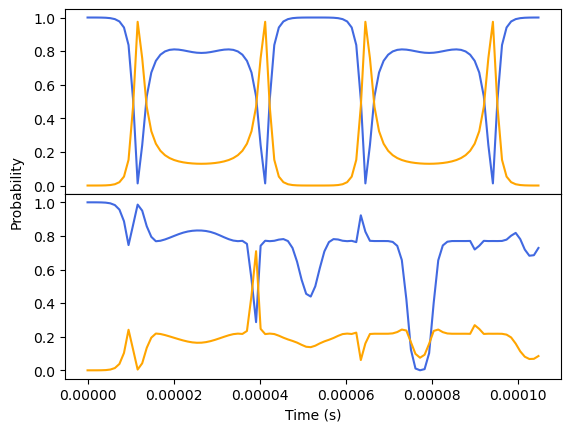

In [69]:
f, axes = plt.subplots(2,1,sharex=True,figsize=(figX,figY))
plt.setp(axes,label='Time (s)')
axes[0].plot(t_range[0:100],proj_0_t[0:100],label=r'$p_0$ for $\omega_r$',c='royalblue')
axes[0].plot(t_range[0:100],proj_1_t[0:100],label=r'$p_1$ for $\omega_r$',c='orange')
axes[1].plot(t_range[0:100],proj_0_t_095[0:100],label=r'$p_0$ for $0.95\omega_r$',c='royalblue')
axes[1].plot(t_range[0:100],proj_1_t_095[0:100],label=r'$p_1$ for $0.95\omega_r$',c='orange')
axes[-1].set_xlabel('Time (s)')
f.text(0.05, 0.5, 'Probability', ha='center', va='center', rotation='vertical')
f.subplots_adjust(hspace=0)

Here we decreased $\omega$ which changes our $\alpha$ so as mentioned before, the Rabi oscillations will begin to decay. This makes sense as even in classical systems such as RLC circuits or even as basic as a swing in a playground, driving frequencies away from the resonant frequency will cause the system to decay in its oscillations. In this case, it seems like the periodic nature, like in the case of dot separation, is lost.

### EXTENSION

We want to observe the effects of varying temperature to the population distribution of the electrons. To do so we will use the partition function for the first two states,

\begin{equation*}
Z = e^{\frac{-\beta \hbar \omega}{2}} (1+e^{-\beta \hbar \omega})
\end{equation*}

where $\beta = \frac{1}{k_B T}$ and $k_B$ is Boltzmann's constant.

232.0654140542407


/var/folders/36/7tk34cnx7ln37s2qkhnchxcw0000gn/T/ipykernel_54445/2196817590.py:12: RuntimeWarning: invalid value encountered in divide
  P0_vals /= Z
/var/folders/36/7tk34cnx7ln37s2qkhnchxcw0000gn/T/ipykernel_54445/2196817590.py:13: RuntimeWarning: invalid value encountered in divide
  P1_vals /= Z


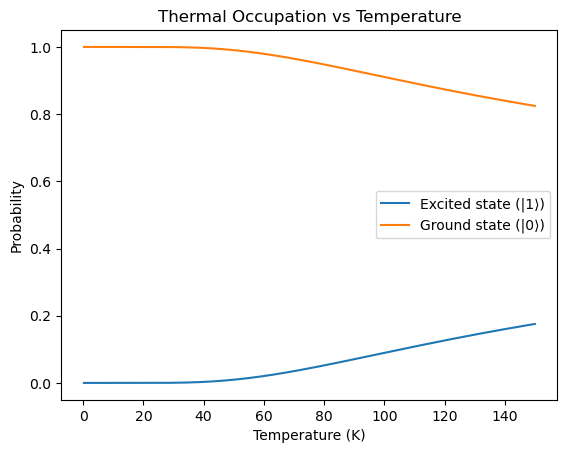

In [90]:
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m

kB = 1.3806452 *1e-23
hbar_omega_over_kB = hbar*omega/kB  # in Kelvin

T_vals = np.linspace(0.1, 150, 1000)  # Temperature range in Kelvin
P1_vals = np.exp(3/2 * -hbar_omega_over_kB / T_vals)
P0_vals = np.exp(1/2 * -hbar_omega_over_kB / T_vals)
Z = P0_vals + P1_vals # Partition function (only 2 states)
P0_vals /= Z
P1_vals /= Z

plt.plot(T_vals, P1_vals, label="Excited state (|1⟩)")
plt.plot(T_vals, P0_vals, label="Ground state (|0⟩)")
plt.xlabel("Temperature (K)")
plt.ylabel("Probability")
plt.title("Thermal Occupation vs Temperature")
plt.legend()
plt.show()

We find that as we increase the temperature, the electrons have a higher likelihood of being in an excited state. This would mean that the quantum dots become harder to use as a qubit as logic that involves the ground state would break as there is a chance that the dots are already excited. However as we can see, if we work in the regime of 100 mK to 1 K range, our distribution of electrons would be largely desired as everything is in the ground state making manipulations of qubit much easier.

Furthermore, in a real quantum dot system, we would see some noise. Aforementioned, the Rabi oscillation is modulated by the wavefunction and as such despite the high frequency of the resonant frequency $\omega_r$, the Rabi oscillation's period depends on the period of the wavefunction which as seen in the Rabi oscillation graph, is extremely low. This means that the system would be susceptible to pink noise, $1/f$.

/var/folders/36/7tk34cnx7ln37s2qkhnchxcw0000gn/T/ipykernel_54445/1829461944.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=0, inplace=True)


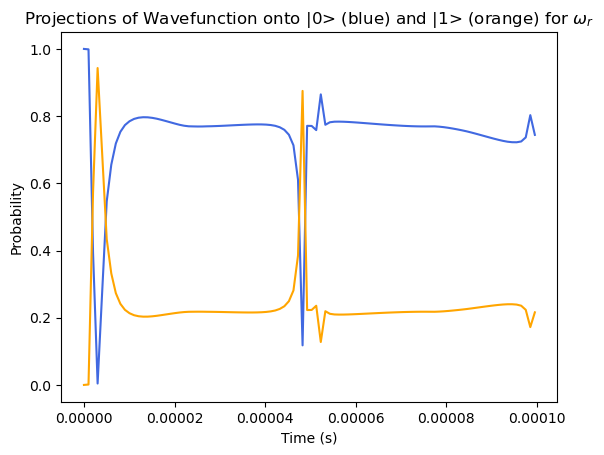

In [122]:
import pandas as pd

# This function generates an array of length nrows 
# containing 1/f noise.

def voss(nrows, ncols=16):
    
    # From Allen Downey, Think DSP
    
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values


r = 40
alpha = (2e-2*q)**2*m/(2*hbar**2)
omega = np.sqrt(2*m*alpha)/m

# No detuning bias for resonant frequency
omega_r = eigenstates(H_build(V_DQD(r,omega)))[2]/hbar

# With detuning
psi_0 = eigenstates(H_build(V_DQD(r,omega_r)))[0]
psi_1 = eigenstates(H_build(V_DQD(r,omega_r)))[1]
F = 2e4

t_min = 0
t_max = 2 * np.pi / (omega_r)
dt = t_max/50
t_range = np.arange(t_min,2*t_max,dt)

num_timesteps = len(t_range)
delta_F_array = voss(num_timesteps)  # 1/f noise array

# Scale the noise appropriately
noise_amplitude = F/(1e2)  # [V/m]
delta_F_array = noise_amplitude * (delta_F_array - np.mean(delta_F_array)) / np.std(delta_F_array)
proj_0_t = []
proj_1_t = []

psi = psi_0.copy()

for idx, t in enumerate(t_range):
    delta_F = delta_F_array[idx]
    F_effective = F + delta_F
    Vt = V_DQDF(F_effective,omega_r,r,t)
    Ht = H_build(Vt)

    c0 = np.vdot(psi_0, psi)
    c1 = np.vdot(psi_1, psi)

    p0 = np.abs(c0)**2
    p1 = np.abs(c1)**2

    proj_0_t.append(p0)
    proj_1_t.append(p1)

    Vt_next = V_DQDF(F,omega_r,r,t+dt)
    Ht_next = H_build(Vt_next)

    A = np.eye(Np) + 1j * dt/(2*hbar) * Ht_next
    B = np.eye(Np) - 1j * dt/(2*hbar) * Ht

    psi_new = np.linalg.solve(A,B @ psi)
    psi = psi_new / np.linalg.norm(psi_new)

proj_0_t = np.array(proj_0_t)
proj_1_t = np.array(proj_1_t)

plt.figure(figsize=(figX,figY))
plt.plot(t_range, proj_0_t, label="Projection onto |0> (blue)",c='royalblue')
plt.plot(t_range, proj_1_t, label="Projection onto |1> (orange)",c='orange')
plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.title(r"Projections of Wavefunction onto |0> (blue) and |1> (orange) for $\omega_r$")
plt.show()


The introduced noise could not be seen on the scale of 1 or 10 but with a noise amplitude of 100 or more, the noise can be seen disrupting the Rabi oscillations. Due to the limited dt step size, we could not achieve a less destructive noise amount but we expect that with higher dt we would see a more gradual deteoriation of the Rabi oscillations.

## Conclusion

We successfully simulated our own quantum dot. By investigating the various parameters that define it such as temperature, electric field strength, size of the quantum dot, dot separation for double quantum dot systems and the harmonic oscillator's frequency, we are able to produce our very own quantum dot. We first looked at the single quantum dot system and how the potential well model as quantum mechanics predicted would influence the electron's behaviour inside the dot. We found that as expected, the wavefunction defined would be confined to the physical system i.e the size of the quantum dot. We then look at the energy separation and how the oscillation frequency influenced the energy level splitting. The electronic energy separation decreased as $\alpha$ decreased, approaching degeneracy. Here is where we defined our computational accuracy as we knew the theoretical model of this relationship. We found that increasing the mesh size would more accurately depict the relationship as so this assertion was made for all other relationships. Next we looked at the double quantum dot system and how the tunnelling parameter, dictated by the dot separation, affected the wavefunctions of the electrons. An interesting result arose when the tunnelling barrier was raised really high as to restrict tunnelling completely. We found that the wavefunctions then localised in each quantum dot but now segregated by the quantum state, this would be a numerical method error as theoretically, there should be no electronic preference. Applying an external electric field, we found that this shifted each wavefunction towards a quantum dot and flipping the electric field shifted each wavefunction towards the other. The electric field also changed the electronic energy separation, when the electric field was zero, the levels were degenerate. Lastly, we looked at Rabi oscillations. Similar to classical driving frequencies, if the electric field was flipped periodically, the states would also change in the same period. This oscillation was perfect for specific values of dot separation, oscillation frequency and electric field strength and only for some resonant frequency.